## Load Stuff

In [2]:
import torch
from mario_gpt import MarioDataset, MarioLM, TrainingConfig, MarioGPTTrainer
from mario_gpt.utils import view_level, convert_level_to_png, join_list_of_list, characterize

/home/shyam/anaconda3/envs/py39/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
BASE = "distilgpt2"

In [19]:
a = torch.zeros((10, 700))

In [20]:
a[:, 350:450] = 1.0

In [28]:
a.shape

torch.Size([10, 700])

In [63]:
int(448 * 0.16) - int(448 * 0.16) % 14 + 14

84

In [62]:
14*6

84

In [ ]:
14

In [61]:
448 / 14

32.0

In [67]:
((448 - 84) / 2) // 14

13.0

In [80]:
a.nonzero()[[1,2,3], 0]

tensor([0, 0, 0])

In [70]:
a.nonzero()[:, 1].shape

torch.Size([1000])

In [42]:
a[a.nonzero()[:, 0], a.nonzero()[:, 1]]

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 

In [26]:
torch.nonzero(a)

tensor([[  0, 350],
        [  0, 351],
        [  0, 352],
        ...,
        [  9, 447],
        [  9, 448],
        [  9, 449]])

In [3]:
mario_lm = MarioLM(lm_path=BASE, tokenizer_path=BASE)

Using distilgpt2 lm


/home/shyam/anaconda3/envs/py39/lib/python3.9/site-packages/transformers/models/auto/modeling_auto.py:1248: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(
Some weights of GPT2LMHeadModel were not initialized from the model checkpoint at distilgpt2 and are newly initialized: ['transformer.h.4.ln_cross_attn.weight', 'transformer.h.3.crossattention.c_proj.bias', 'transformer.h.4.crossattention.bias', 'transformer.h.3.ln_cross_attn.weight', 'transformer.h.3.crossattention.masked_bias', 'transformer.h.0.ln_cross_attn.weight', 'transformer.h.1.crossattention.masked_bias', 'transformer.h.3.crossattention.q_attn.weight', 'transformer.h.4.crossattention.c_attn.weight', 'transformer.h.1.crossattention.bias', 'transformer.h.5.ln_cross_attn.weight', 'transformer

Using distilgpt2 tokenizer


### Load Dataset (Optional)

In [4]:
dataset = MarioDataset(mario_lm.tokenizer)

Token indices sequence length is longer than the specified maximum sequence length for this model (102116 > 1024). Running this sequence through the model will result in indexing errors


No level string specified, using default string FULL_LEVEL_STR_WITH_PATHS...





In [5]:
view_level(dataset.input_ids[:700], dataset.tokenizer)

['--------------------------------------------------',
 '--------------------------------------------------',
 '--------------------------------------------------',
 '--------------------------------------------------',
 '-------------------------------------------------o',
 '--------XSSSSS---------------------------------SSS',
 '--------X-----------------------------------------',
 '--------X-----------------------------------------',
 '-------EX--E-X---------------xxxx-?-----------xxxx',
 '--------XSS?SX---QQ?QQ------xx<>-x-----------xx--?',
 '---------------------------xx-[]--x---------xx----',
 '--------------------------xx--[]---x-------xx-----',
 'xxxxxxxxxxxxxxxxxxxxxxxxxxx---[]----xxxxxxxx------',
 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX---XXX']

/home/shyam/anaconda3/envs/py39/lib/python3.9/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


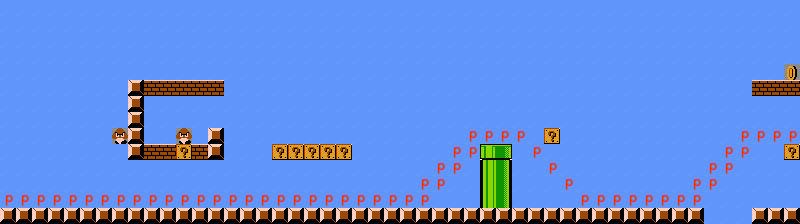

In [6]:
img = convert_level_to_png(dataset.input_ids[:700],  dataset.tokenizer)[0]
img

### Setup training

In [7]:
config = TrainingConfig()

In [8]:
trainer = MarioGPTTrainer(mario_lm, dataset, config=config)

/home/shyam/anaconda3/envs/py39/lib/python3.9/site-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [9]:
trainer.train(100, batch_size=1)

Training for 100 Iterations and batch_size 1
================== Training Config ==================
gradient_accumulation_steps -- 1
mixed_precision -- no
output_dir -- Mario-GPT2-700-context-length
learning_rate -- 0.0005
epsilon -- 1e-09
lr_warmup_steps -- 1000
batch_size -- 4
total_steps -- 50000
mask_proportion -- 0.0
eval_iteration -- 1000
save_iteration -- 5000
================== MarioLM ==================
Follow tensorboard with: python -m tensorboard.main --logdir /home/shyam/Code/mario-gpt/notebooks/Mario-GPT2-700-context-length/logs


{'loss': 2.4640018939971924, 'last_lr': 5e-07}:   1%|▏                  | 1/100 [00:01<01:39,  1.01s/it]


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /tmp/ipykernel_47923/4240629865.py:1 in <cell line: 1>                                           │
│                                                                                                  │
│ [Errno 2] No such file or directory: '/tmp/ipykernel_47923/4240629865.py'                        │
│                                                                                                  │
│ /home/shyam/anaconda3/envs/py39/lib/python3.9/site-packages/mario_gpt-0.1.3-py3.9.egg/mario_gpt/ │
│ trainer.py:196 in train                                                                          │
│                                                                                                  │
│   193 │   │   model.train()                                                                      │
│   194 │   │                                                                                      │
│   195 │   │   for i in bar:                                                                      │
│ ❱ 196 │   │   │   loss, grad_dict = self.train_iter(                                             │
│   197 │   │   │   │   self.accelerator,                                                          │
│   198 │   │   │   │   model,                                                                     │
│   199 │   │   │   │   self.train_dataset,                                                        │
│                                                                                                  │
│ /home/shyam/anaconda3/envs/py39/lib/python3.9/site-packages/mario_gpt-0.1.3-py3.9.egg/mario_gpt/ │
│ trainer.py:147 in train_iter                                                                     │
│                                                                                                  │
│   144 │   │                                                                                      │
│   145 │   │   with accelerator.accumulate(model):                                                │
│   146 │   │   │   model.zero_grad()                                                              │
│ ❱ 147 │   │   │   outputs = model(                                                               │
│   148 │   │   │   │   input_ids=b_input_ids.to(device),                                          │
│   149 │   │   │   │   labels=b_labels,                                                           │
│   150 │   │   │   │   attention_mask=attention_masks,                                            │
│                                                                                                  │
│ /home/shyam/anaconda3/envs/py39/lib/python3.9/site-packages/torch/nn/modules/module.py:1194 in   │
│ _call_impl                                                                                       │
│                                                                                                  │
│   1191 │   │   # this function, and just call forward.                                           │
│   1192 │   │   if not (self._backward_hooks or self._forward_hooks or self._forward_pre_hooks o  │
│   1193 │   │   │   │   or _global_forward_hooks or _global_forward_pre_hooks):                   │
│ ❱ 1194 │   │   │   return forward_call(*input, **kwargs)                                         │
│   1195 │   │   # Do not call functions when jit is used                                          │
│   1196 │   │   full_backward_hooks, non_full_backward_hooks = [], []                             │
│   1197 │   │   if self._backward_hooks or _global_backward_hooks:                                │
│                                                                                                  │
│ /home/shyam/anaconda3/envs/py39/lib/python3.9/site-packages/transformers/models/gpt2/modeling_gp │
│ t2.py:1043 in forward                                      